In [6]:
from nltk.corpus import brown
import nltk

In [7]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [8]:
brown_tagged_sents[0]

[(u'The', u'AT'),
 (u'Fulton', u'NP-TL'),
 (u'County', u'NN-TL'),
 (u'Grand', u'JJ-TL'),
 (u'Jury', u'NN-TL'),
 (u'said', u'VBD'),
 (u'Friday', u'NR'),
 (u'an', u'AT'),
 (u'investigation', u'NN'),
 (u'of', u'IN'),
 (u"Atlanta's", u'NP$'),
 (u'recent', u'JJ'),
 (u'primary', u'NN'),
 (u'election', u'NN'),
 (u'produced', u'VBD'),
 (u'``', u'``'),
 (u'no', u'AT'),
 (u'evidence', u'NN'),
 (u"''", u"''"),
 (u'that', u'CS'),
 (u'any', u'DTI'),
 (u'irregularities', u'NNS'),
 (u'took', u'VBD'),
 (u'place', u'NN'),
 (u'.', u'.')]

In [4]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]

In [5]:
nltk.FreqDist(tags).max()

u'NN'

In [6]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')

In [7]:
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [14]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

In [15]:
patterns = [
(r'.*ing$', 'VBG'),
(r'.*ed$', 'VBD'),
(r'.*es$', 'VBZ'),
(r'.*ould$', 'MD'),
(r'.*\'s$', 'NN$'),
(r'.*s$', 'NNS'),
(r'^-?[0-9]+(.[0-9]+)?$', 'CD'),
(r'.*', 'NN')
]

In [16]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [27]:
type(brown_sents[3])

list

In [18]:
regexp_tagger.tag(brown_sents[3])

[(u'``', 'NN'),
 (u'Only', 'NN'),
 (u'a', 'NN'),
 (u'relative', 'NN'),
 (u'handful', 'NN'),
 (u'of', 'NN'),
 (u'such', 'NN'),
 (u'reports', 'NNS'),
 (u'was', 'NNS'),
 (u'received', 'VBD'),
 (u"''", 'NN'),
 (u',', 'NN'),
 (u'the', 'NN'),
 (u'jury', 'NN'),
 (u'said', 'NN'),
 (u',', 'NN'),
 (u'``', 'NN'),
 (u'considering', 'VBG'),
 (u'the', 'NN'),
 (u'widespread', 'NN'),
 (u'interest', 'NN'),
 (u'in', 'NN'),
 (u'the', 'NN'),
 (u'election', 'NN'),
 (u',', 'NN'),
 (u'the', 'NN'),
 (u'number', 'NN'),
 (u'of', 'NN'),
 (u'voters', 'NNS'),
 (u'and', 'NN'),
 (u'the', 'NN'),
 (u'size', 'NN'),
 (u'of', 'NN'),
 (u'this', 'NNS'),
 (u'city', 'NN'),
 (u"''", 'NN'),
 (u'.', 'NN')]

In [20]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.keys()[:100]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.005171350717027666

In [21]:
sent = brown.sents(categories='news')[3]

In [22]:
baseline_tagger.tag(sent)

[(u'``', None),
 (u'Only', None),
 (u'a', None),
 (u'relative', None),
 (u'handful', None),
 (u'of', None),
 (u'such', None),
 (u'reports', u'NNS'),
 (u'was', None),
 (u'received', None),
 (u"''", None),
 (u',', None),
 (u'the', None),
 (u'jury', None),
 (u'said', None),
 (u',', None),
 (u'``', None),
 (u'considering', None),
 (u'the', None),
 (u'widespread', None),
 (u'interest', None),
 (u'in', None),
 (u'the', None),
 (u'election', None),
 (u',', None),
 (u'the', None),
 (u'number', None),
 (u'of', None),
 (u'voters', None),
 (u'and', None),
 (u'the', None),
 (u'size', None),
 (u'of', None),
 (u'this', None),
 (u'city', None),
 (u"''", None),
 (u'.', None)]

In [23]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

In [24]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

In [25]:
def display():
    import pylab
    words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

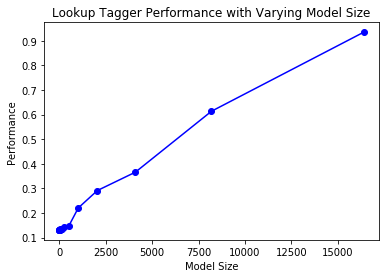

In [137]:
display()